In [2]:
import array, os
import ROOT
from ROOT import TCanvas
ROOT.gROOT.SetStyle("ATLAS")

from hpana.samples.higgs import Higgs


Welcome to JupyROOT 6.14/08


INFO:db:Loading cross sections from /project/6024950/sbahrase/HPlusTauNu/hpana/hpana/db/xsec/xsec.pkl ...


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file Signal_Acceptance_Efficiency.png has been created
Info in <TCanvas::Print>: pdf file Signal_Acceptance_Efficiency.pdf has been created
Info in <TCanvas::Print>: eps file Signal_Acceptance_Efficiency.eps has been created


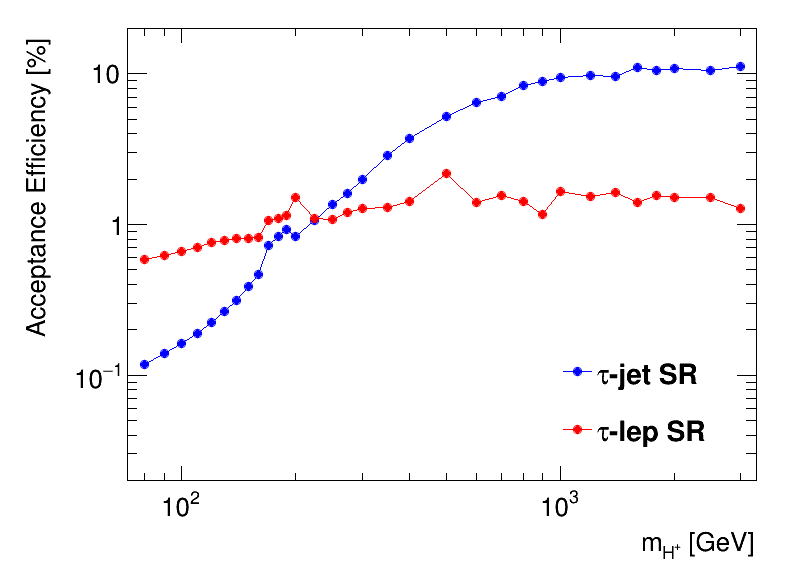

In [30]:
PATH = "/project/6024950/sbahrase/HPlusTauNu/hpana/workAREAAA/PLOTTING/v06Final/"
LUMI = 138620
def plot_eff(ifile, lumi=LUMI, region="SR_TAULEP"):
    effs = {}
    tf = ROOT.TFile(ifile)
    for m in Higgs.MASSES:
        th = tf.Get("NOMINAL/Hplus%i_category_%s_var_tau_0_q"%(m, region))
        err = ROOT.Double(0.)
        selected = th.IntegralAndError(0, th.GetNbinsX()+1, err)
        effs[m] = (selected/LUMI, (err/LUMI)**2)

    xs = array.array('d')
    ys = array.array('d')
    ex = array.array('d')
    ey = array.array('d')
    for mass in sorted(effs.keys()):
      xs.append(mass)
      ys.append(100.*effs[mass][0]) # *100 -> %
      ex.append(0.)
      e = 100.*effs[mass][1]**0.5
      if mass >= 200: 
        e *= 5 #<! due to negative weights
      ey.append(e)

    g = ROOT.TGraphErrors(len(effs), xs, ys, ex, ey)

    return g

hflep = PATH+"v06Htl_1518_nom_03062019/HISTS_taulep_2019_06_03.root"
hfjet = PATH+"v06Htj_1518_sigEff_03062019/HISTS_taujet_2019_06_03.root"

g150 = plot_eff(hfjet, region="SR_TAUJET")
glep = plot_eff(hflep, region="SR_TAULEP")

c = ROOT.TCanvas("c", "c", 800, 600)
leg = ROOT.TLegend(0.7, 0.2, 0.9, 0.4)
g150.SetTitle("Efficiency vs Mass")
g150.SetMinimum(0)
g150.SetMaximum(20)

g150.SetMarkerColor(ROOT.kBlue)
g150.SetLineColor(ROOT.kBlue)
g150.Draw()
leg.AddEntry(g150, "#tau-jet SR", "LP")

glep.SetMarkerColor(ROOT.kRed)
glep.SetLineColor(ROOT.kRed)
leg.AddEntry(glep, "#tau-lep SR", "LP")
glep.Draw("LP SAME")

c.SetLogx()
c.SetLogy()

g150.GetXaxis().SetTitle("m_{H^{+}} [GeV]")
g150.GetYaxis().SetTitle("Acceptance Efficiency [%]")

leg.Draw("SAME")
c.Draw()
c.Print("Signal_Acceptance_Efficiency.png")
c.Print("Signal_Acceptance_Efficiency.pdf")
c.Print("Signal_Acceptance_Efficiency.eps")

